In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv('../data/supervised_dataset/telecom_churn_clean.csv')

In [3]:
df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [4]:
df.describe()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
count,3333.00000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,1666.00000,101.064806,437.182418,0.096910,0.276628,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,962.29855,39.822106,42.371290,0.295879,0.447398,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,0.00000,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,833.00000,74.000000,408.000000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,1666.00000,101.000000,415.000000,0.000000,0.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,2499.00000,127.000000,510.000000,0.000000,1.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,3332.00000,243.000000,510.000000,1.000000,1.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [5]:
df.count()

Unnamed: 0                3333
account_length            3333
area_code                 3333
international_plan        3333
voice_mail_plan           3333
number_vmail_messages     3333
total_day_minutes         3333
total_day_calls           3333
total_day_charge          3333
total_eve_minutes         3333
total_eve_calls           3333
total_eve_charge          3333
total_night_minutes       3333
total_night_calls         3333
total_night_charge        3333
total_intl_minutes        3333
total_intl_calls          3333
total_intl_charge         3333
customer_service_calls    3333
churn                     3333
dtype: int64

In [9]:
X = df[['total_day_charge', 'total_eve_charge']].values
y = df['churn'].values

In [11]:
# Instantiate the model
knn = KNeighborsClassifier(n_neighbors=15)

# Fit the model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [12]:
# New data for prediction
X_new = np.array([[30, 10], [40, 20], [50, 30]])

# Make predictions
predictions = knn.predict(X_new)
print(predictions)  # [1, 0, 0]

[0 0 1]


TypeError: Number of dimensions of x (2) and y (1) do not match

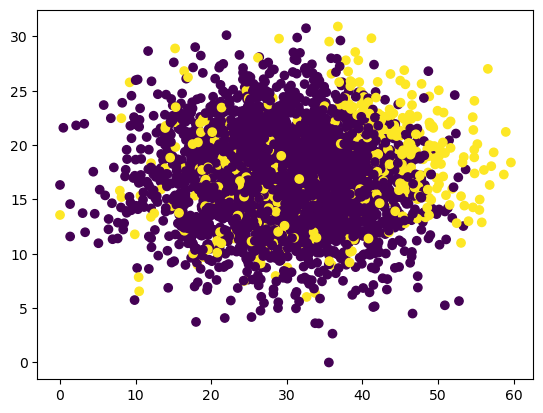

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X, y, (X.T)*y, alpha=0.3)
plt.xlabel('Total Day Charge')
plt.ylabel('Total Evening Charge')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print(f"Model accuracy: {accuracy:.2f}")

Model accuracy: 0.88


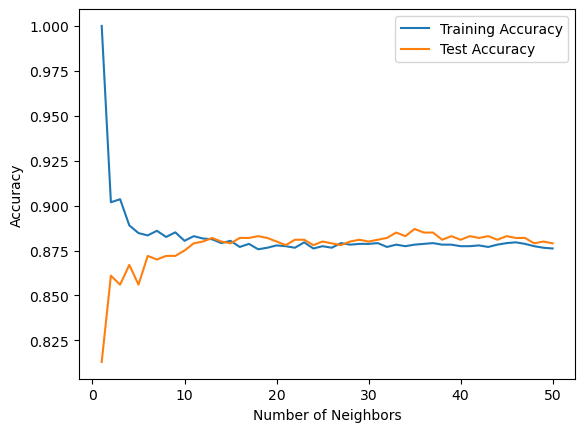

In [21]:
neighbors = range(1, 51)
train_accuracy = {}
test_accuracy = {}

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[k] = knn.score(X_train, y_train)
    test_accuracy[k] = knn.score(X_test, y_test)

plt.plot(neighbors, list(train_accuracy.values()), label="Training Accuracy")
plt.plot(neighbors, list(test_accuracy.values()), label="Test Accuracy")
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [2]:
diabetes_df = pd.read_csv('../data/supervised_dataset/diabetes_clean.csv')
diabetes_df

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [16]:
X = diabetes_df.drop('glucose', axis=1).values
y = diabetes_df['glucose'].values

# Using single feature (BMI) for simplicity
X_bmi = X[:, 4].reshape(-1, 1)


In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_bmi, y)
# Generate predictions
predictions = model.predict(X_bmi)

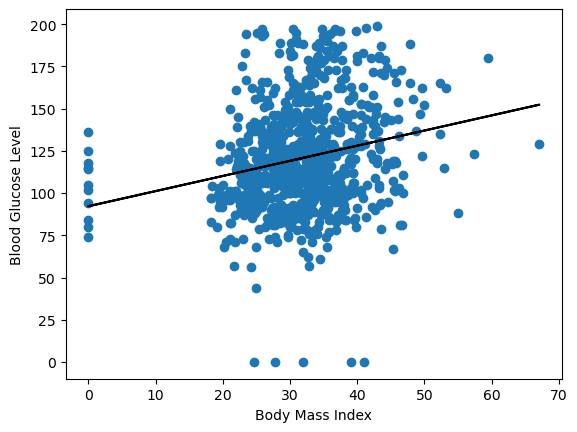

In [21]:
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions, color='black')
plt.xlabel('Body Mass Index')
plt.ylabel('Blood Glucose Level')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = diabetes_df.drop(['glucose', 'diabetes'], axis=1).values
y = diabetes_df['glucose'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Create and fit model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [25]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse:.2f}")

RMSE: 28.68


/home/pratyush/.conda/envs/DTC/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [26]:
r_squared = model.score(X_test, y_test)
print(f"R-squared: {r_squared:.2f}")

R-squared: 0.15


In [2]:
ad_df = pd.read_csv('../data/supervised_dataset/advertising_and_sales_clean.csv')

In [3]:
X = ad_df.drop(columns=['influencer', 'sales'], axis=1).values
y = ad_df['sales'].values

In [4]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
import numpy as np

# Create KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Instantiate model
model = LinearRegression()

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf)

# Print results
print(cv_results)

# Calculate statistics
mean_score = np.mean(cv_results)
std_score = np.std(cv_results)
confidence_interval = np.quantile(cv_results, [0.025, 0.975])

print(f"Mean R-squared: {mean_score}")
print(f"Standard deviation: {std_score}")
print(f"95% Confidence Interval: {confidence_interval}")


[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
Mean R-squared: 0.9989911695584723
Standard deviation: 3.895599514495595e-05
95% Confidence Interval: [0.99893558 0.99905335]


In [7]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
import numpy as np

# Create KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=42)

# Instantiate model
model = Ridge(alpha=0.1)

# Perform cross-validation
cv_results = cross_val_score(model, X, y, cv=kf)

# Print results
print(cv_results)

# Calculate statistics
mean_score = np.mean(cv_results)
std_score = np.std(cv_results)
confidence_interval = np.quantile(cv_results, [0.025, 0.975])

print(f"Mean R-squared: {mean_score}")
print(f"Standard deviation: {std_score}")
print(f"95% Confidence Interval: {confidence_interval}")


[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
Mean R-squared: 0.9989911695584723
Standard deviation: 3.8955995144987074e-05
95% Confidence Interval: [0.99893558 0.99905335]


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pregnancies  768 non-null    int64  
 1   glucose      768 non-null    int64  
 2   diastolic    768 non-null    int64  
 3   triceps      768 non-null    int64  
 4   insulin      768 non-null    int64  
 5   bmi          768 non-null    float64
 6   dpf          768 non-null    float64
 7   age          768 non-null    int64  
 8   diabetes     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Instantiate the classifier
clf = LogisticRegression(max_iter=1000000)

X = diabetes_df.iloc[:, 0:8].values
y = diabetes_df.iloc[:, -1].values

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Predict probabilities
y_pred_probs = clf.predict_proba(X_test)[:, 1]  # Probabilities for positive class

In [26]:
from sklearn.metrics import classification_report, confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Compute classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[78 21]
 [18 37]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



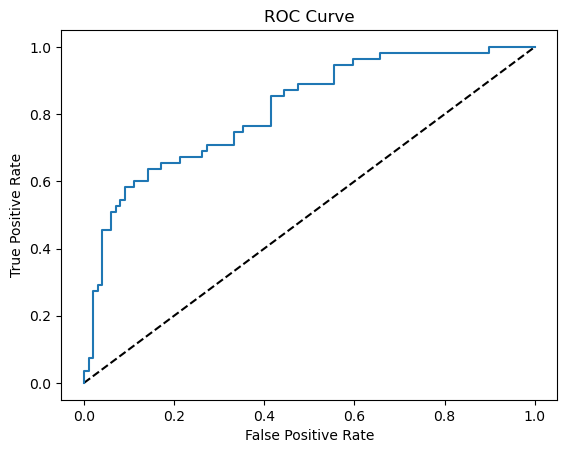

In [27]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Plot ROC curve
plt.figure()
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [31]:
from sklearn.metrics import roc_auc_score

auc_score = roc_auc_score(y_test, y_pred_probs)
print(f"AUC Score: {auc_score:.2f}")

AUC Score: 0.81


In [39]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegressionCV

# Set up KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid
param_grid = {
    'l1_ratios': [[0.1,0.2]]
}

# Instantiate the model
knn = LogisticRegressionCV(max_iter=100000, penalty="l1")

# Perform Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=kf)
grid_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/pratyush/.conda/envs/DTC/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/pratyush/.conda/envs/DTC/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pratyush/.conda/envs/DTC/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 1839, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/pratyush/.conda/envs/DTC/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py", line 67, in _check_solver
    raise ValueError(
ValueError: Solver lbfgs supports only 'l2' or None penalties, got l1 penalty.


In [33]:
from sklearn.model_selection import RandomizedSearchCV

# Perform Random Search
random_search = RandomizedSearchCV(knn, param_grid, n_iter=10, cv=kf, random_state=42)
random_search.fit(X_train, y_train)

# Get best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate on test set
test_score = random_search.score(X_test, y_test)
print("Test set score:", test_score)


/home/pratyush/.conda/envs/DTC/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters: {'n_neighbors': 11, 'metric': 'manhattan'}
Best score: 0.25977582092933593
Test set score: 0.18517405459554193


In [2]:
music_df = pd.read_csv('../data/supervised_dataset/music_clean.csv')

In [3]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1000 non-null   int64  
 1   popularity        1000 non-null   float64
 2   acousticness      1000 non-null   float64
 3   danceability      1000 non-null   float64
 4   duration_ms       1000 non-null   float64
 5   energy            1000 non-null   float64
 6   instrumentalness  1000 non-null   float64
 7   liveness          1000 non-null   float64
 8   loudness          1000 non-null   float64
 9   speechiness       1000 non-null   float64
 10  tempo             1000 non-null   float64
 11  valence           1000 non-null   float64
 12  genre             1000 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 101.7 KB


In [4]:
music_df.head()

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.177,0.000002,0.1160,-14.824,0.0353,92.934,0.618,1
1,37591,63.0,0.003840,0.635,190448.0,0.908,0.083400,0.2390,-4.795,0.0563,110.012,0.637,1
2,37658,59.0,0.000075,0.352,456320.0,0.956,0.020300,0.1250,-3.634,0.1490,122.897,0.228,1
3,36060,54.0,0.945000,0.488,352280.0,0.326,0.015700,0.1190,-12.020,0.0328,106.063,0.323,1
4,35710,55.0,0.245000,0.667,273693.0,0.647,0.000297,0.0633,-7.787,0.0487,143.995,0.300,1


In [12]:
# Create dummy variables
genre_dummies = pd.get_dummies(music_df['genre'])

In [14]:
# Combine with original DataFrame
df_with_dummies = pd.concat([music_df, genre_dummies], axis=1)

In [15]:
df_with_dummies

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre,0,1
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1,False,True
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1,False,True
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1,False,True
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1,False,True
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0,True,False
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0,True,False
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0,True,False
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0,True,False


In [16]:
# Remove original categorical column
df_with_dummies = df_with_dummies.drop('genre', axis=1)

# Alternative: Create dummies for entire DataFrame
# music_dummies = pd.get_dummies(df, columns=['genre'], drop_first=True)

In [17]:
df_with_dummies

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,0,1
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,False,True
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,False,True
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,False,True
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,False,True
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,True,False
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,True,False
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,True,False
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,True,False


In [18]:
columns_to_keep = music_df.columns[music_df.isnull().mean() < 0.05].tolist()
# Remove rows with missing values in these columns
music_df_cleaned = music_df.dropna(subset=columns_to_keep)


In [19]:
music_df_cleaned

,Unnamed: 0,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,genre
0,36506,60.0,0.896000,0.726,214547.0,0.1770,0.000002,0.1160,-14.824,0.0353,92.934,0.6180,1
1,37591,63.0,0.003840,0.635,190448.0,0.9080,0.083400,0.2390,-4.795,0.0563,110.012,0.6370,1
2,37658,59.0,0.000075,0.352,456320.0,0.9560,0.020300,0.1250,-3.634,0.1490,122.897,0.2280,1
3,36060,54.0,0.945000,0.488,352280.0,0.3260,0.015700,0.1190,-12.020,0.0328,106.063,0.3230,1
4,35710,55.0,0.245000,0.667,273693.0,0.6470,0.000297,0.0633,-7.787,0.0487,143.995,0.3000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44501,57.0,0.972000,0.193,208040.0,0.0329,0.929000,0.0978,-28.228,0.0460,82.165,0.0366,0
996,25114,56.0,0.005790,0.939,144453.0,0.3730,0.000000,0.2740,-7.779,0.2270,119.953,0.0602,0
997,46896,54.0,0.016100,0.739,238339.0,0.5390,0.000000,0.2350,-9.735,0.3370,85.082,0.8350,0
998,45135,62.0,0.326000,0.515,286707.0,0.5050,0.000000,0.1020,-5.606,0.0294,150.063,0.5380,0
